In [60]:
import yfinance as yf
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# Fetch historical treasury yield data using yfinance
treasury_data = yf.download(['^IRX', '^FVX', '^TNX', '^TYX'], start="2020-01-01", end="2023-10-24")['Adj Close']

[*********************100%%**********************]  4 of 4 completed


In [14]:
# Create a DataFrame with treasury yields and stock returns
# Create synthetic stock returns data
np.random.seed(0)
n = len(treasury_data)
stock_returns = np.random.randn(n)


data = pd.DataFrame({
    '1Y': treasury_data['^IRX'],
    '5Y': treasury_data['^FVX'],
    '10Y': treasury_data['^TNX'],
    '30Y': treasury_data['^TYX'],
    'Stock_Returns': stock_returns
})

In [21]:
treasury_data.cov()

,^FVX,^IRX,^TNX,^TYX
^FVX,2.309228,2.869069,1.885274,1.494108
^IRX,2.869069,4.199600,2.342547,1.904478
^TNX,1.885274,2.342547,1.563803,1.252805
^TYX,1.494108,1.904478,1.252805,1.017483


In [48]:
treasury_data.std()

^FVX    1.519614
^IRX    2.049293
^TNX    1.250521
^TYX    1.008703
dtype: float64

In [49]:
treasury_data.mean()

^FVX    2.001414
^IRX    1.677801
^TNX    2.206114
^TYX    2.614616
dtype: float64

In [24]:
correlation = data.corr().loc['1Y', '5Y']

In [47]:
correlation

0.9213053927718279

In [57]:
spearman_corr = data.corr(method='spearman')
kendall_corr = data.corr(method='kendall')

In [58]:
spearman_corr

,1Y,5Y,10Y,30Y,Stock_Returns
1Y,1.00,0.78,0.75,0.72,0.03
5Y,0.78,1.00,0.99,0.96,-0.00
10Y,0.75,0.99,1.00,0.99,-0.00
30Y,0.72,0.96,0.99,1.00,-0.00
Stock_Returns,0.03,-0.00,-0.00,-0.00,1.00


In [59]:
kendall_corr

,1Y,5Y,10Y,30Y,Stock_Returns
1Y,1.00,0.57,0.52,0.50,0.02
5Y,0.57,1.00,0.91,0.84,-0.00
10Y,0.52,0.91,1.00,0.91,-0.00
30Y,0.50,0.84,0.91,1.00,-0.00
Stock_Returns,0.02,-0.00,-0.00,-0.00,1.00


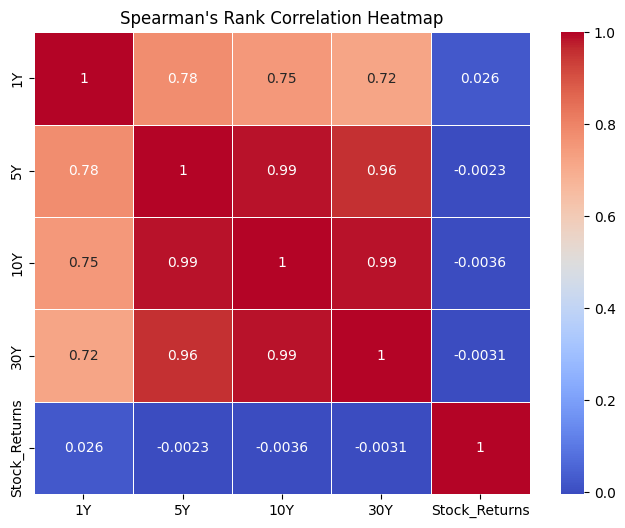

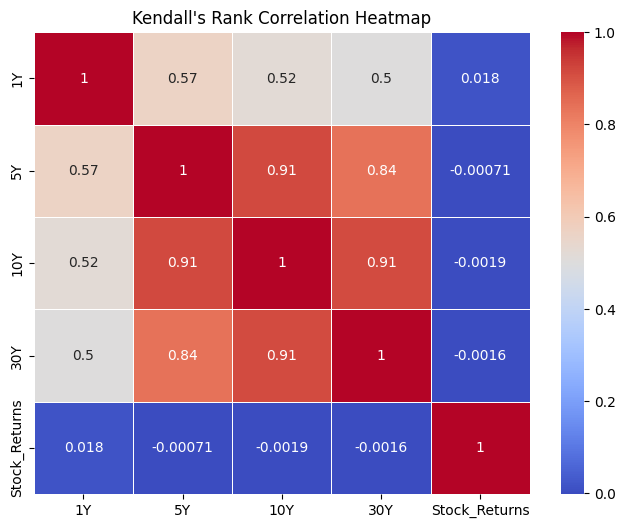

In [61]:
# Create a heatmap for Spearman's rank correlation
plt.figure(figsize=(8, 6))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Spearman's Rank Correlation Heatmap")
plt.show()

# Create a heatmap for Kendall's rank correlation
plt.figure(figsize=(8, 6))
sns.heatmap(kendall_corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Kendall's Rank Correlation Heatmap")
plt.show()








In [38]:
correlation_0 = data.corr().loc['10Y', '30Y']

In [46]:
correlation_0

0.9931818629955922

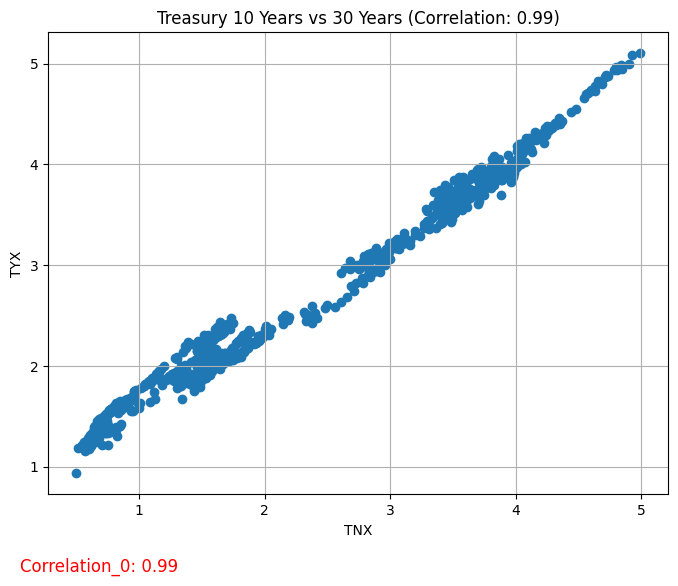

In [43]:
plt.figure(figsize=(8, 6))
plt.scatter(treasury_data['^TNX'], treasury_data['^TYX'])
plt.xlabel('TNX')
plt.ylabel('TYX')
plt.title(f'Treasury 10 Years vs 30 Years (Correlation: {correlation_0:.2f})')

plt.grid(True)
# Display the correlation value on the plot
plt.text(0.05, -0.04, f'Correlation_0: {correlation_0:.2f}', fontsize=12, color='red')
plt.show()


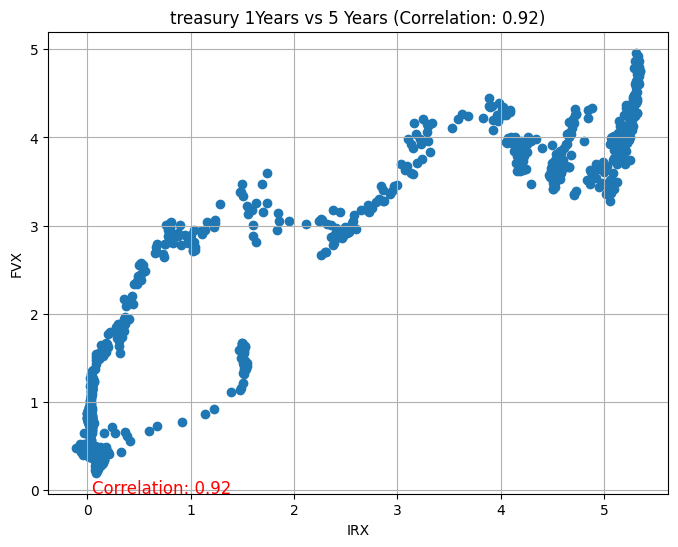

In [27]:
# Create a scatterplot to visualize the returns
plt.figure(figsize=(8, 6))
plt.scatter(treasury_data['^IRX'], treasury_data['^FVX'])
plt.xlabel('IRX')
plt.ylabel('FVX')
plt.title(f'treasury 1Years vs 5 Years (Correlation: {correlation:.2f})')

plt.grid(True)
# Display the correlation value on the plot
plt.text(0.05, -0.04, f'Correlation: {correlation:.2f}', fontsize=12, color='red')
plt.show()

In [28]:
# Perform a reduced-rank regression
X = data[['1Y', '5Y', '10Y', '30Y']].dropna()
X = sm.add_constant(X)  # Add an intercept
Y = data['Stock_Returns'].dropna()

In [29]:
model = sm.OLS(Y, X).fit()

In [30]:
# Print the regression summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          Stock_Returns   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.308
Date:                Tue, 24 Oct 2023   Prob (F-statistic):              0.265
Time:                        13:57:24   Log-Likelihood:                -1353.6
No. Observations:                 959   AIC:                             2717.
Df Residuals:                     954   BIC:                             2741.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5721      0.386     -1.483      0.1

In [31]:
predicted_returns = model.predict(X)

In [34]:
predicted_returns.tail()

Date
2023-10-17    0.044339
2023-10-18    0.038364
2023-10-19    0.051472
2023-10-20    0.076436
2023-10-23    0.061167
dtype: float64

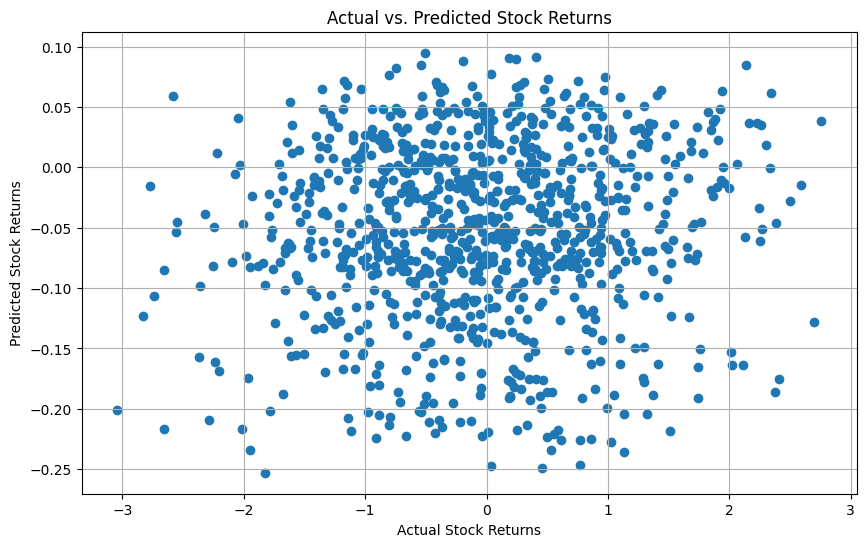

In [33]:
# Visualize the actual vs. predicted stock returns
predicted_returns = model.predict(X)

plt.figure(figsize=(10, 6))
plt.scatter(Y, predicted_returns)
plt.xlabel("Actual Stock Returns")
plt.ylabel("Predicted Stock Returns")
plt.title("Actual vs. Predicted Stock Returns")
plt.grid(True)
plt.show()

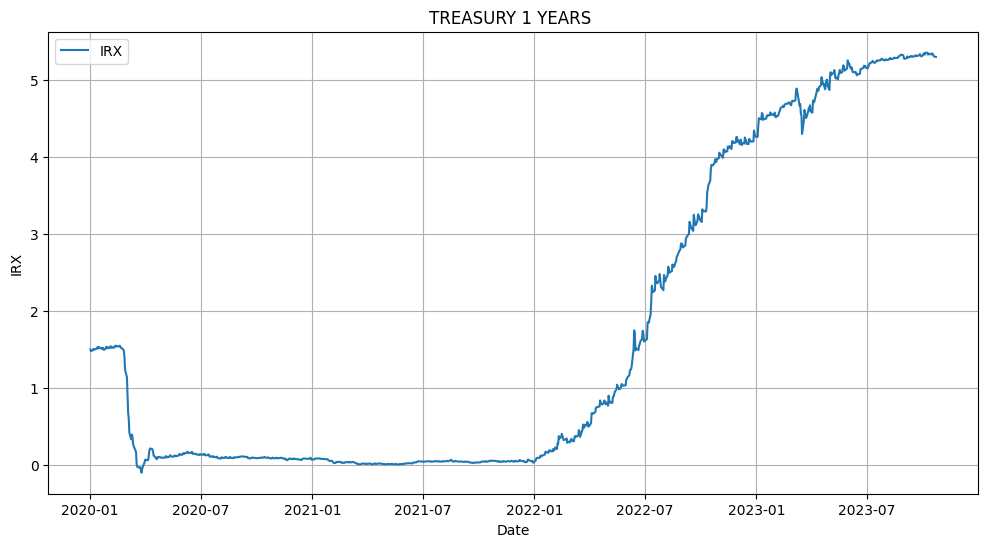

In [37]:
# Create a time series line chart
plt.figure(figsize=(12, 6))
plt.plot(treasury_data['^IRX'], label="IRX")
plt.title("TREASURY 1 YEARS ")
plt.xlabel("Date")
plt.ylabel("IRX")
plt.legend()
plt.grid(True)
plt.show()

In [53]:
from lazypredict.Supervised import LazyRegressor
from pandas.plotting import scatter_matrix# Scikit-learn packages
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error# Hide warnings
from sklearn.model_selection import train_test_split  


In [55]:
# Perform a reduced-rank regression
X = data[['1Y', '5Y', '10Y', '30Y']].dropna()
X = sm.add_constant(X)  # Add an intercept
y = data['Stock_Returns'].dropna()
offset = int(X.shape[0] * 0.9)

X_train, y_train = X[:offset], y[:offset]
X_test, y_test = X[offset:], y[offset:]

In [56]:
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)
print(models)

 24%|██▍       | 10/42 [00:00<00:01, 16.74it/s]

GammaRegressor model failed to execute
Some value(s) of y are out of the valid range of the loss 'HalfGammaLoss'.


 62%|██████▏   | 26/42 [00:01<00:01, 15.51it/s]

PoissonRegressor model failed to execute
Some value(s) of y are out of the valid range of the loss 'HalfPoissonLoss'.


100%|██████████| 42/42 [00:18<00:00,  2.23it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000111 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 949
[LightGBM] [Info] Number of data points in the train set: 863, number of used features: 4
[LightGBM] [Info] Start training from score -0.065094
                               Adjusted R-Squared   R-Squared    RMSE  \
Model                                                                   
MLPRegressor                                -0.04        0.02    1.03   
NuSVR                                       -0.05        0.01    1.03   
KernelRidge                                 -0.07       -0.01    1.04   
QuantileRegressor                           -0.07       -0.01    1.04   
LassoCV                                     -0.07       -0.01    1.04   
Lasso                                       -0.07       -0.01    1.04   
LarsCV                                      -0.07       -0.01    1.04   
Lass